In [ ]:
# Importing important libraries

import pandas as pd
import numpy as np
import datetime
#import plotly as px

#import matplotlib.pyplot as plt
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
import plotly.express as px
import seaborn as sns


In [ ]:
df_china = pd.read_csv("tempCH.csv")
df_malaysia = pd.read_csv("tempMY.csv")

# TEMPERATURE ANALYSIS OF CHINA  

In [ ]:
df_china.head(5)

,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,TS,RH2M,QV2M
0,2018,1,1,-5.33,1.39,-10.23,-4.88,78.06,2.38
1,2018,1,2,-7.27,-3.53,-9.98,-6.41,75.75,1.95
2,2018,1,3,-7.12,-3.74,-9.20,-6.27,80.81,2.08
3,2018,1,4,-6.77,0.38,-11.07,-6.13,82.19,2.20
4,2018,1,5,-6.24,0.65,-10.20,-5.28,81.94,2.26


In [ ]:
df_china.YEAR.value_counts().index

Int64Index([2020, 2019, 2018, 2021], dtype='int64')

In [ ]:
#Change the date format to analyse better
df_china['Date']=df_china['YEAR'].astype(str) + df_china['MO'].astype(str).str.zfill(2)+ df_china['DY'].astype(str).str.zfill(2)
df_china['Date'] = pd.to_datetime(df_china['Date'], format='%Y%m%d')
df_china.set_index('Date', inplace=True)

df_china.head(5)

,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,TS,RH2M,QV2M
Date,,,,,,,,,
2018-01-01,2018,1,1,-5.33,1.39,-10.23,-4.88,78.06,2.38
2018-01-02,2018,1,2,-7.27,-3.53,-9.98,-6.41,75.75,1.95
2018-01-03,2018,1,3,-7.12,-3.74,-9.20,-6.27,80.81,2.08
2018-01-04,2018,1,4,-6.77,0.38,-11.07,-6.13,82.19,2.20
2018-01-05,2018,1,5,-6.24,0.65,-10.20,-5.28,81.94,2.26


In [ ]:
#df_china[['MO','TS']].groupby('MO').mean().sort_values(by='TS', ascending=False)

df1 = df_china[['MO','YEAR','T2M']].groupby(['YEAR','MO']).median().reset_index()
df1["Time"] = df1["YEAR"].astype(str) + ' - ' +df1["MO"].astype(str)

df1.head(5)

,YEAR,MO,T2M,Time
0,2018,1,-7.270,2018 - 1
1,2018,2,-4.830,2018 - 2
2,2018,3,5.950,2018 - 3
3,2018,4,9.845,2018 - 4
4,2018,5,14.340,2018 - 5


In [ ]:
df_china2 = df_china.reset_index()

In [ ]:
fig1 = px.line(df1, x="Time", y="T2M", title='Temperature in China from 2018 to 2021')
fig1.show()

In [ ]:
fig2 = px.line(df_china2, x="Date", y="T2M", title='Temperature in China from 2018 to 2021')
fig2.show()

# RANDOM FOREST MODEL

In [ ]:
df_china2.dropna(inplace=True)

x = df_china2['Date']
y = df_china2['T2M']

In [ ]:
from sklearn.model_selection import train_test_split
# i have spilt data into 75 and 25%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.27, random_state = 0)

# ARIMA Model

In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



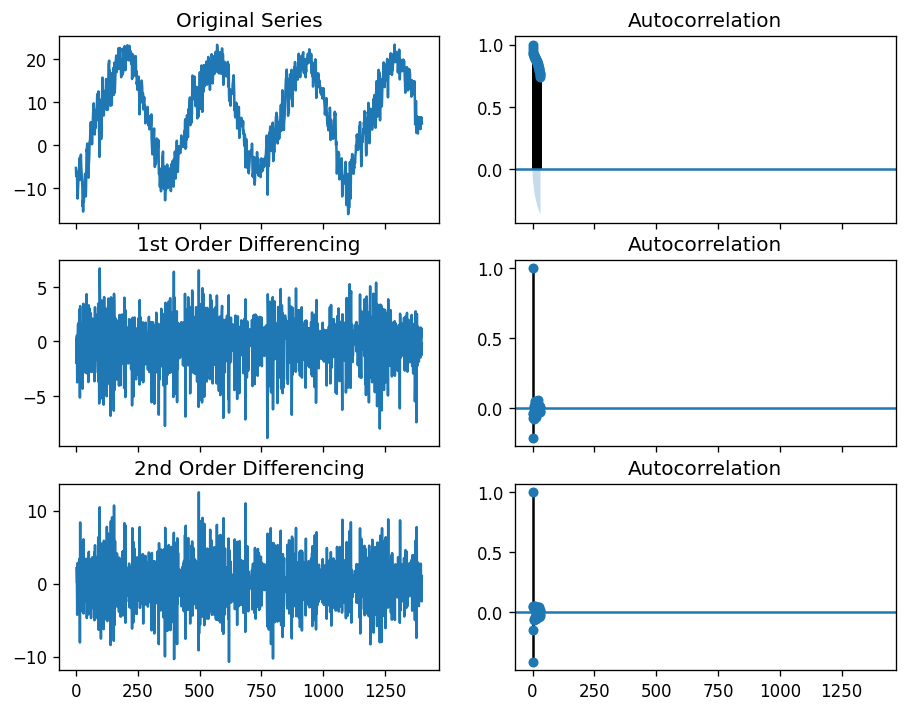

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_china2.T2M); axes[0, 0].set_title('Original Series')
plot_acf(df_china2.T2M, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_china2.T2M.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_china2.T2M.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df_china2.T2M.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_china2.T2M.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 7.2 MB/s 
     |████████████████████████████████| 9.8 MB 41.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# #from pmdarima.arima.utils import ndiffs

# #y = df_china2.T2M

# ## Adf Test
# #ndiffs(y, test='adf')  # 2

# # KPSS test
# #ndiffs(y, test='kpss')  # 0

# # PP test:
# ndiffs(y, test='pp')  # 2


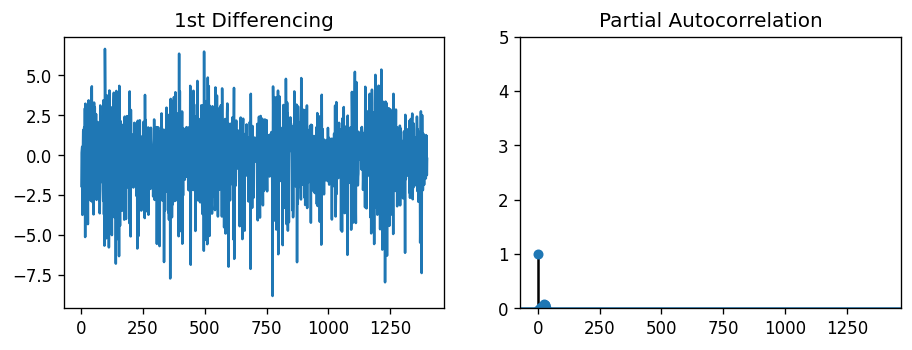

In [ ]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_china2.T2M.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_china2.T2M.diff().dropna(), ax=axes[1])

plt.show()

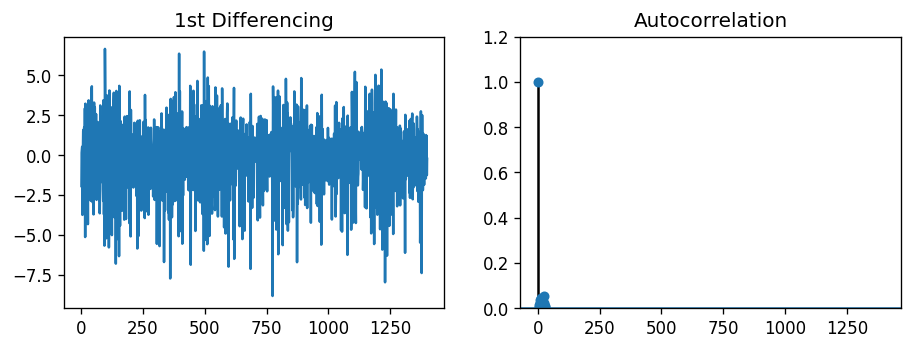

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df_china2.T2M.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_china2.T2M.diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# 1,1,2 ARIMA Model
model = ARIMA(df_china2.T2M, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.T2M   No. Observations:                 1399
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3006.921
Method:                       css-mle   S.D. of innovations              2.076
Date:                Thu, 25 Nov 2021   AIC                           6023.843
Time:                        01:18:03   BIC                           6050.060
Sample:                             1   HQIC                          6033.644
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0087      0.023      0.379      0.705      -0.036       0.054
ar.L1.D.T2M     0.4300      0.057      7.554      0.000       0.318       0.542
ma.L1.D.T2M    -0.5418      0.058     -9.415    

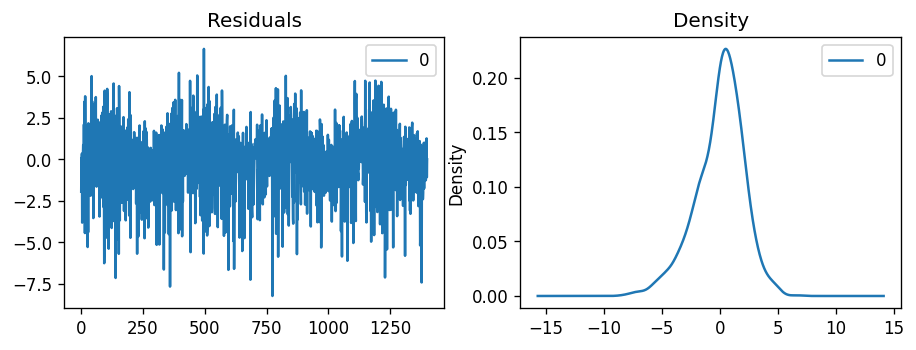

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

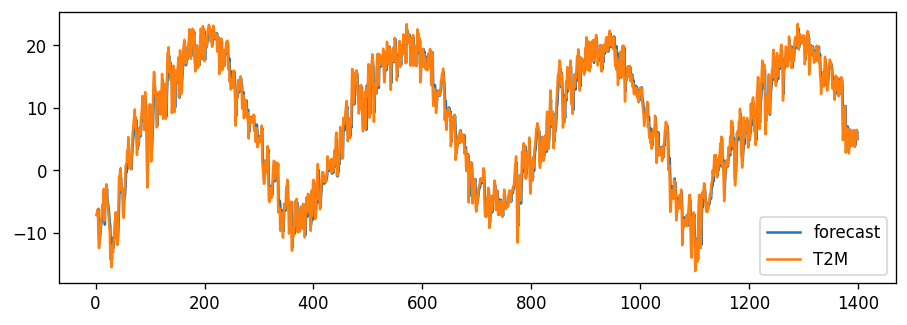

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
len(df_china2)

1400

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df_china2.T2M[:1190]
test = df_china2.T2M[1190:]

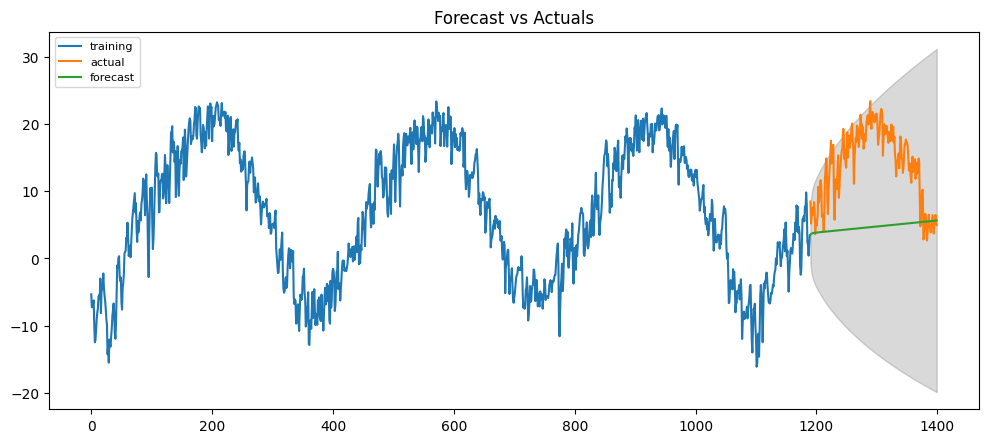

In [ ]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(210, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                  D.T2M   No. Observations:                 1189
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2565.432
Method:                       css-mle   S.D. of innovations              2.093
Date:                Thu, 25 Nov 2021   AIC                           5140.864
Time:                        01:18:30   BIC                           5166.268
Sample:                             1   HQIC                          5150.438
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0090      0.026      0.353      0.724      -0.041       0.059
ar.L1.D.T2M     0.6869      0.041     16.726      0.000       0.606       0.767
ar.L2.D.T2M    -0.1516      0.031     -4.891    

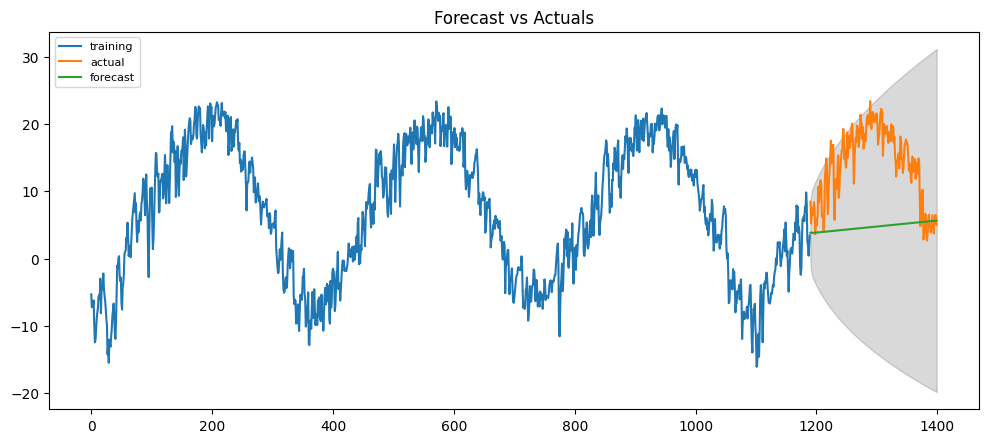

In [ ]:
# Build Model
model = ARIMA(train, order=(2, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(210, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Prophet Model for China Dataframe



In [ ]:
pip install Prophet

     |████████████████████████████████| 65 kB 2.7 MB/s 
     |████████████████████████████████| 49 kB 5.3 MB/s 
     |████████████████████████████████| 216 kB 19.4 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640947 sha256=cabe1e0abc86cd5bf23b2666a9045dca2bf0e472e26138fc3480fa60c257f794
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
data = df_china2.rename(columns={'Date': 'ds', 'T2M' : 'y'})
data = data[['ds','y']]

data

,ds,y
0,2018-01-01,-5.33
1,2018-01-02,-7.27
2,2018-01-03,-7.12
3,2018-01-04,-6.77
4,2018-01-05,-6.24
...,...,...
1395,2021-10-27,4.98
1396,2021-10-28,5.30
1397,2021-10-29,6.48
1398,2021-10-30,5.22


In [ ]:
train = data.query('ds < "2021-01-01"')
test = data.query('ds >= "2021-01-01"')

test.shape[0]

304

In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=304)
future.tail()

,ds
1395,2021-10-27
1396,2021-10-28
1397,2021-10-29
1398,2021-10-30
1399,2021-10-31


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1395,2021-10-27,3.881402,0.571236,7.346673
1396,2021-10-28,3.584618,0.379369,7.187808
1397,2021-10-29,3.276374,-0.010636,6.696032
1398,2021-10-30,3.104934,-0.166747,6.481285
1399,2021-10-31,2.709411,-0.730770,5.943914


In [ ]:
metric_df = forecast.set_index('ds')[['yhat']].join(test.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

metric_df

,ds,yhat,y
1096,2021-01-01,-7.841811,-7.48
1097,2021-01-02,-7.875686,-7.85
1098,2021-01-03,-8.121426,-6.74
1099,2021-01-04,-8.023740,-10.03
1100,2021-01-05,-7.856711,-11.89
...,...,...,...
1395,2021-10-27,3.881402,4.98
1396,2021-10-28,3.584618,5.30
1397,2021-10-29,3.276374,6.48
1398,2021-10-30,3.104934,5.22


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(metric_df.y, metric_df.yhat)
mse = mean_squared_error(metric_df.y, metric_df.yhat)
mae = mean_absolute_error(metric_df.y, metric_df.yhat)

print(f"r2_score: {r2}, \nmean_squared_error: {mse}, \nmean_absolute_error: {mae}")

r2_score: 0.8850044637732566, 
mean_squared_error: 9.07598198586689, 
mean_absolute_error: 2.4022110973875326


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


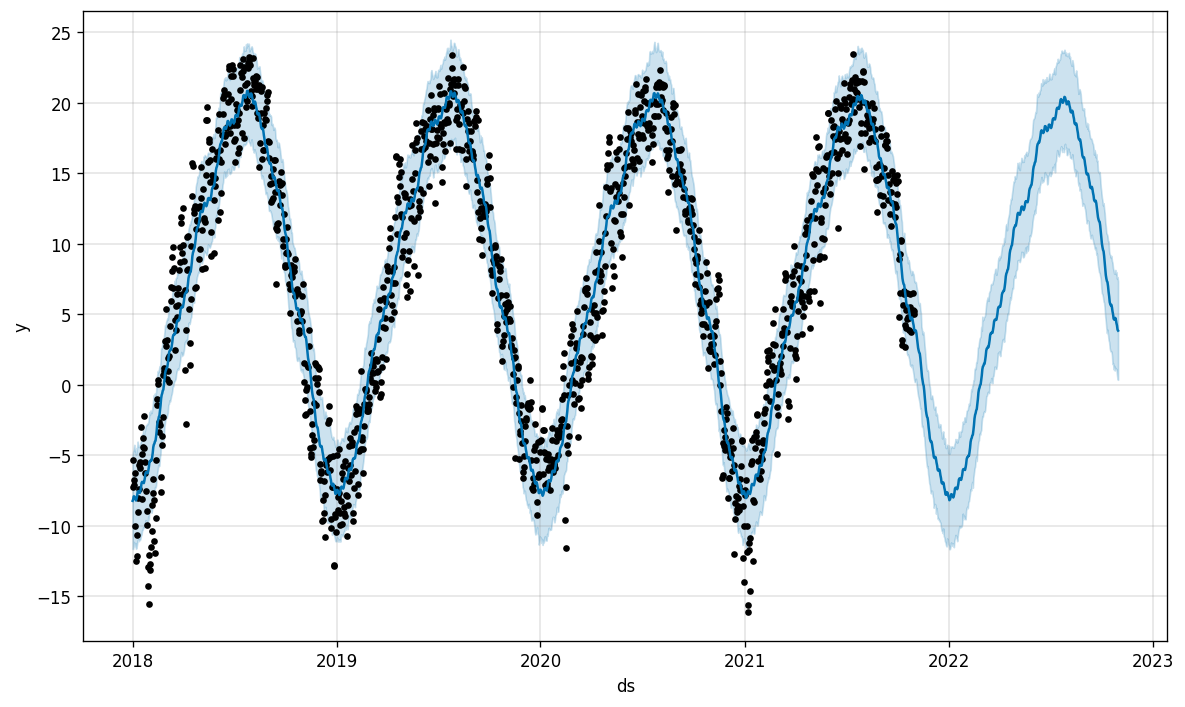

In [ ]:
modFinal = Prophet()
modFinal.fit(data)
future = modFinal.make_future_dataframe(periods=365)
forecast = modFinal.predict(future)
fig1 = modFinal.plot(forecast)

# TEMPERATURE ANALYSIS OF MALAYSIA

In [ ]:
 df_malaysia.head(5)

,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,TS,RH2M,QV2M
0,2018,1,1,24.27,27.40,21.88,24.19,93.88,18.13
1,2018,1,2,24.41,27.08,22.53,24.26,94.50,18.43
2,2018,1,3,24.65,27.83,22.61,24.55,93.00,18.37
3,2018,1,4,24.69,27.52,22.77,24.43,92.75,18.37
4,2018,1,5,24.73,27.80,22.35,24.70,91.44,18.07


In [ ]:
df_malaysia.YEAR.value_counts().index

Int64Index([2020, 2019, 2018, 2021], dtype='int64')

In [ ]:
#Change the date format to analyse better
df_malaysia['Date']=df_malaysia['YEAR'].astype(str) + df_malaysia['MO'].astype(str).str.zfill(2)+ df_malaysia['DY'].astype(str).str.zfill(2)
df_malaysia['Date'] = pd.to_datetime(df_malaysia['Date'], format='%Y%m%d')
df_malaysia.set_index('Date', inplace=True)

df_malaysia.head(5)

,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,TS,RH2M,QV2M
Date,,,,,,,,,
2018-01-01,2018,1,1,24.27,27.40,21.88,24.19,93.88,18.13
2018-01-02,2018,1,2,24.41,27.08,22.53,24.26,94.50,18.43
2018-01-03,2018,1,3,24.65,27.83,22.61,24.55,93.00,18.37
2018-01-04,2018,1,4,24.69,27.52,22.77,24.43,92.75,18.37
2018-01-05,2018,1,5,24.73,27.80,22.35,24.70,91.44,18.07


In [ ]:
df_malay2 = df_malaysia.reset_index()

df_malay2.head(5)

,Date,YEAR,MO,DY,T2M,T2M_MAX,T2M_MIN,TS,RH2M,QV2M
0,2018-01-01,2018,1,1,24.27,27.40,21.88,24.19,93.88,18.13
1,2018-01-02,2018,1,2,24.41,27.08,22.53,24.26,94.50,18.43
2,2018-01-03,2018,1,3,24.65,27.83,22.61,24.55,93.00,18.37
3,2018-01-04,2018,1,4,24.69,27.52,22.77,24.43,92.75,18.37
4,2018-01-05,2018,1,5,24.73,27.80,22.35,24.70,91.44,18.07


In [ ]:
fig3 = px.line(df_malay2, x="Date", y="T2M", title='Temperature in China from 2018 to 2021')
fig3.show()

# Prophet Model for Malaysian Dataframe

In [ ]:
data1 = df_malay2.rename(columns={'Date': 'ds', 'T2M' : 'y'})
data1 = data1[['ds','y']]

data1

,ds,y
0,2018-01-01,24.27
1,2018-01-02,24.41
2,2018-01-03,24.65
3,2018-01-04,24.69
4,2018-01-05,24.73
...,...,...
1395,2021-10-27,26.96
1396,2021-10-28,25.90
1397,2021-10-29,25.12
1398,2021-10-30,26.40


In [ ]:
train1 = data1.query('ds < "2021-01-01"')
test1 = data1.query('ds >= "2021-01-01"')

test.shape[0]

304

In [ ]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future1 = m.make_future_dataframe(periods=304)
future.tail()

,ds
1760,2022-10-27
1761,2022-10-28
1762,2022-10-29
1763,2022-10-30
1764,2022-10-31


In [ ]:
forecast1 = m.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1760,2022-10-27,2.958294,-0.338498,6.475020
1761,2022-10-28,2.648783,-0.619371,6.058975
1762,2022-10-29,2.478359,-0.665163,5.889207
1763,2022-10-30,2.086165,-1.369477,5.286955
1764,2022-10-31,2.026009,-1.513405,5.468481


In [ ]:
metric_df1 = forecast.set_index('ds')[['yhat']].join(test.set_index('ds').y).reset_index()
metric_df1.dropna(inplace=True)

metric_df1

,ds,yhat,y
1096,2021-01-01,-7.773029,-7.48
1097,2021-01-02,-7.855824,-7.85
1098,2021-01-03,-8.045419,-6.74
1099,2021-01-04,-7.978085,-10.03
1100,2021-01-05,-7.839310,-11.89
...,...,...,...
1395,2021-10-27,4.755344,4.98
1396,2021-10-28,4.634581,5.30
1397,2021-10-29,4.385273,6.48
1398,2021-10-30,4.203187,5.22


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2 = r2_score(metric_df1.y, metric_df1.yhat)
mse = mean_squared_error(metric_df1.y, metric_df1.yhat)
mae = mean_absolute_error(metric_df1.y, metric_df1.yhat)

print(f"r2_score: {r2}, \nmean_squared_error: {mse}, \nmean_absolute_error: {mae}")

r2_score: 0.909754808161432, 
mean_squared_error: 7.122569817170553, 
mean_absolute_error: 2.080177027763529


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


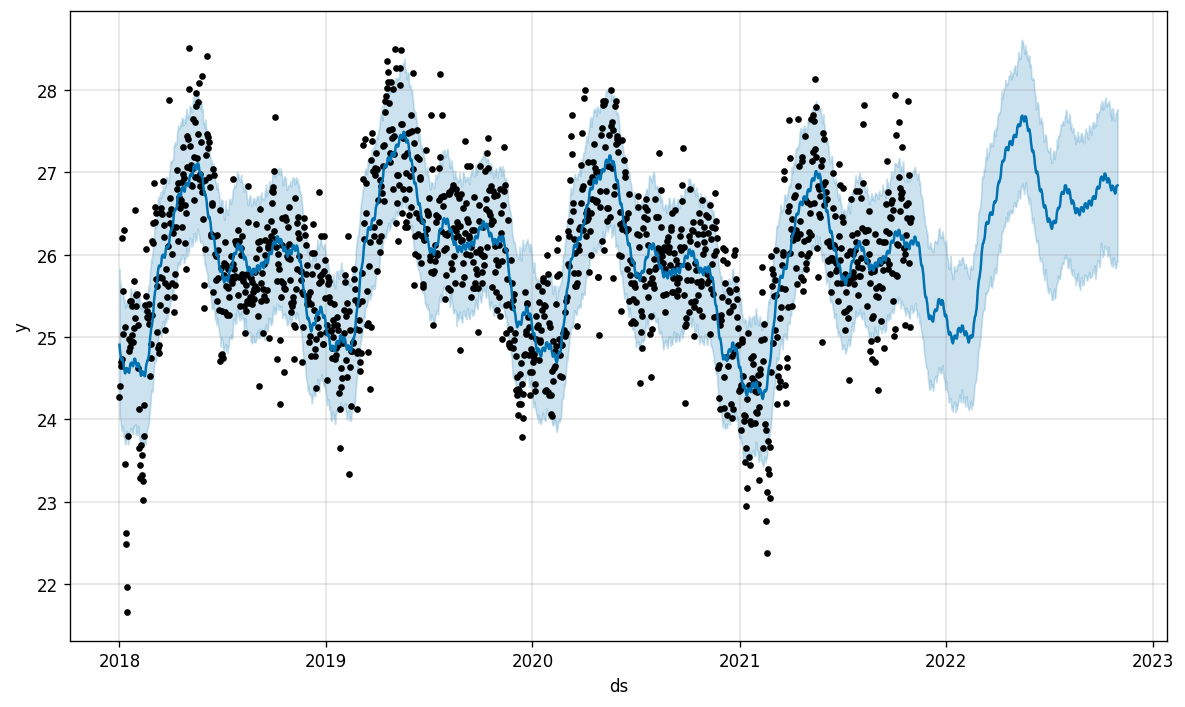

In [ ]:
modFinal1 = Prophet()
modFinal1.fit(data1)
future1 = modFinal1.make_future_dataframe(periods=365)
forecast = modFinal1.predict(future1)
fig4 = modFinal1.plot(forecast)